# Insurance Premium Predection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Datacouncil11/Insurance_premium_Predection/main/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.shape

(1338, 7)

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
df.duplicated().sum()

1

In [11]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [15]:
df.shape

(1337, 7)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [17]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [19]:
print("Categorical values in 'Sex' Variable:", end = " ")
print(df['sex'].unique())

print("Categorical values in 'Smoker' Variable:", end = " ")
print(df['smoker'].unique())

print("Categorical values in 'children' Variable:", end = " ")
print(df['children'].unique())

print("Categorical values in 'region' Variable:", end = " ")
print(df['region'].unique())

Categorical values in 'Sex' Variable: ['female' 'male']
Categorical values in 'Smoker' Variable: ['yes' 'no']
Categorical values in 'children' Variable: [0 1 3 2 5 4]
Categorical values in 'region' Variable: ['southwest' 'southeast' 'northwest' 'northeast']


In [20]:
# Difining numerical columns

In [23]:
numerical_features = []
for features in df.columns:
    if df[features].dtype != 'O':
        numerical_features.append(features)
print('We have numerical features in our dataset:', numerical_features)

We have numerical features in our dataset: ['age', 'bmi', 'children', 'expenses']


In [24]:
# Categorical columns

In [25]:
categorical_features = []
for features in df.columns:
    if df[features].dtype == 'O':
        categorical_features.append(features)
print('We have numerical features in our dataset:', categorical_features)

We have numerical features in our dataset: ['sex', 'smoker', 'region']


<Axes: xlabel='smoker', ylabel='count'>

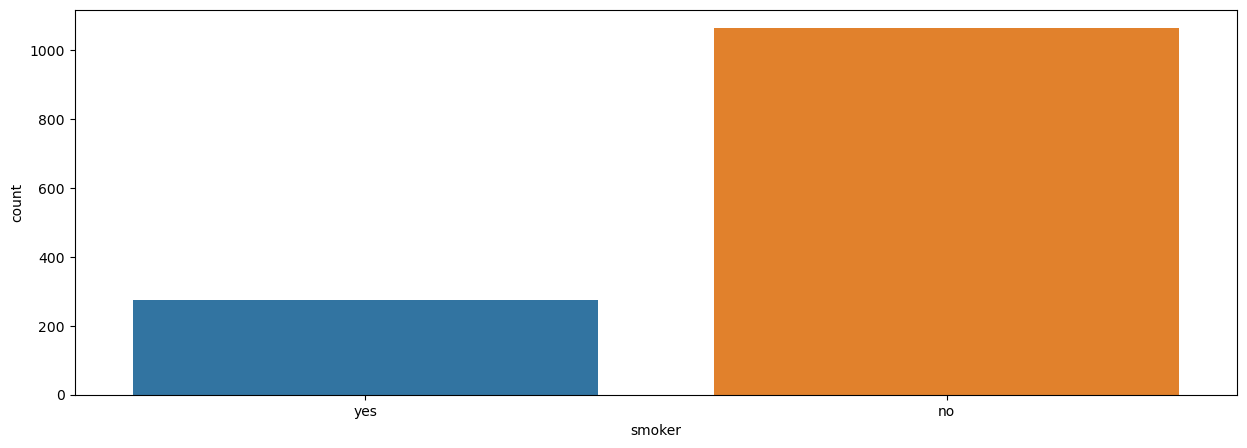

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x='smoker',data=df)

In [27]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


<Axes: xlabel='region', ylabel='count'>

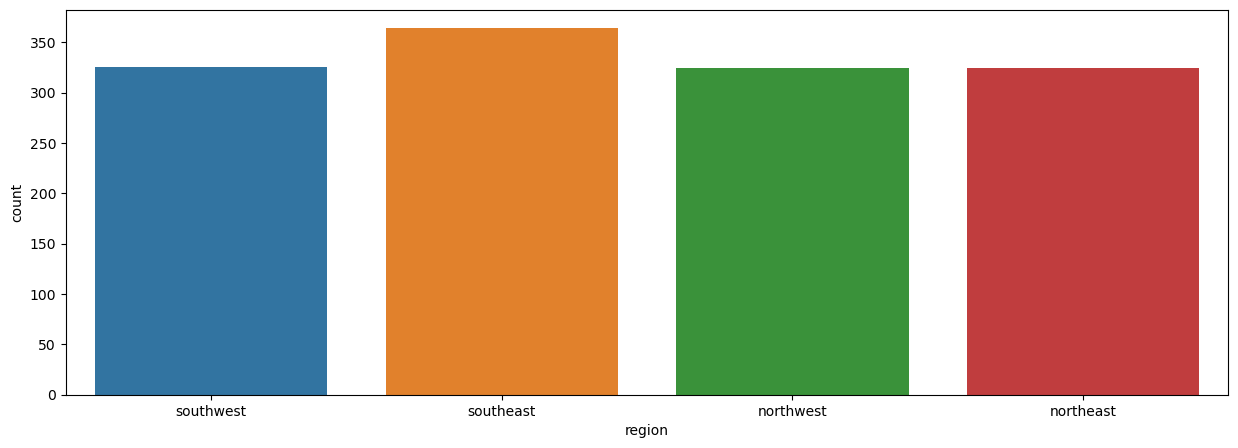

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(x='region',data=df)

# Pairplot

<Figure size 1500x500 with 0 Axes>

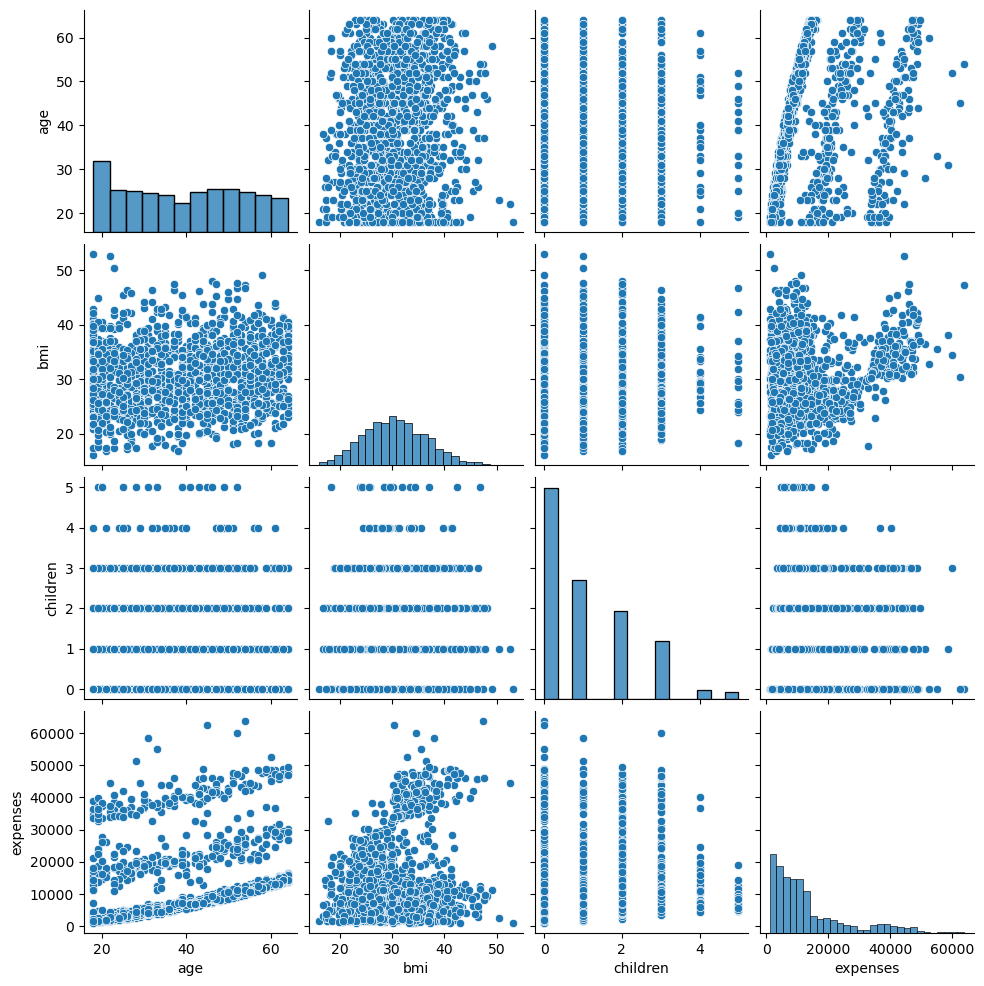

In [30]:
plt.figure(figsize=(15,5))
sns.pairplot(df)

# Heatmap

In [31]:
df.corr(numeric_only=True)

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


<Axes: >

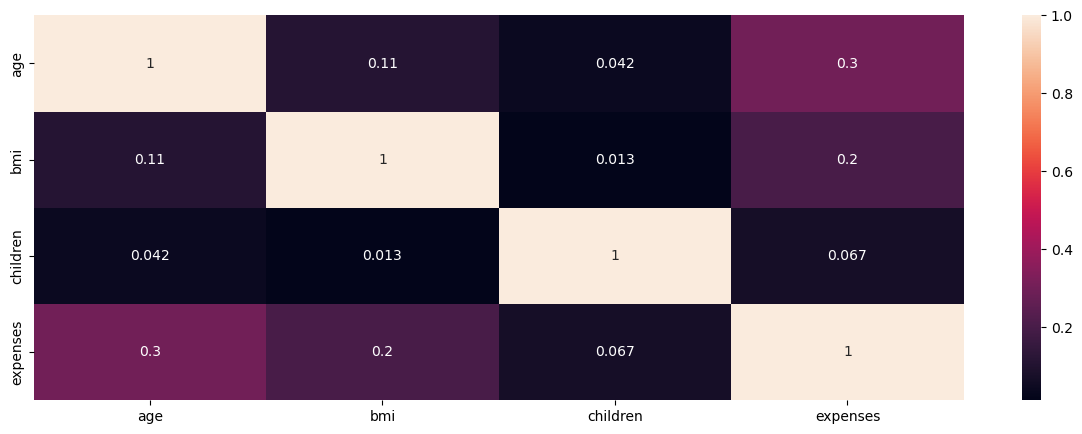

In [40]:
plt.figure(figsize=(15,5))
sns.heatmap(data=df[numerical_features].corr(),annot=True)

# Visualization of Numerical Features With Target Feature

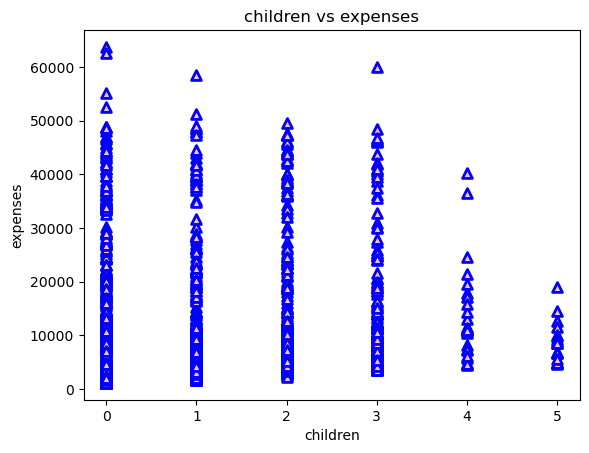

In [41]:
plt.scatter(df['children'], df['expenses'],c = 'pink',
           linewidths=2,
           marker='^',
           edgecolor='Blue',
           s= 50)
plt.xlabel('children')
plt.ylabel('expenses')
plt.title('children vs expenses')
plt.show()

# Age vs Expenses

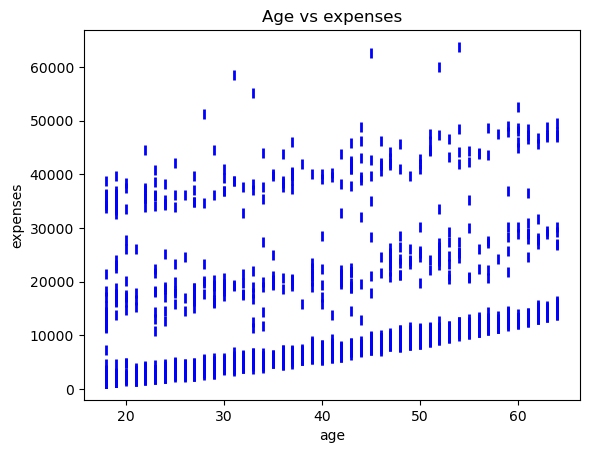

In [44]:
plt.scatter(df['age'], df['expenses'],c = 'blue',
           linewidths=2,
           marker='|',
           edgecolor='green',
           s= 50)
plt.xlabel('age')
plt.ylabel('expenses')
plt.title('Age vs expenses')
plt.show()

<Axes: xlabel='age', ylabel='expenses'>

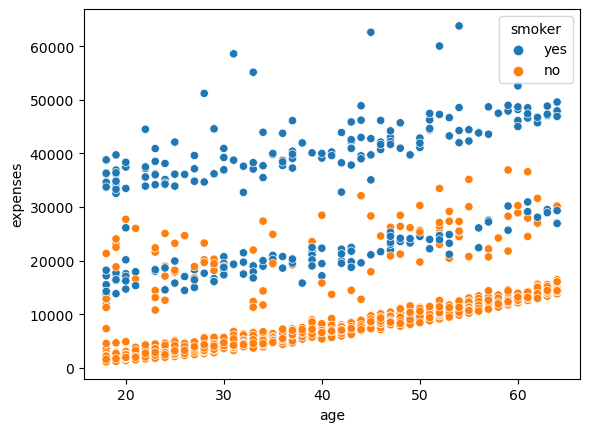

In [45]:
sns.scatterplot(data=df, x = 'age', y= 'expenses', hue = 'smoker')

# BMI vs Expenses

<Axes: xlabel='bmi', ylabel='expenses'>

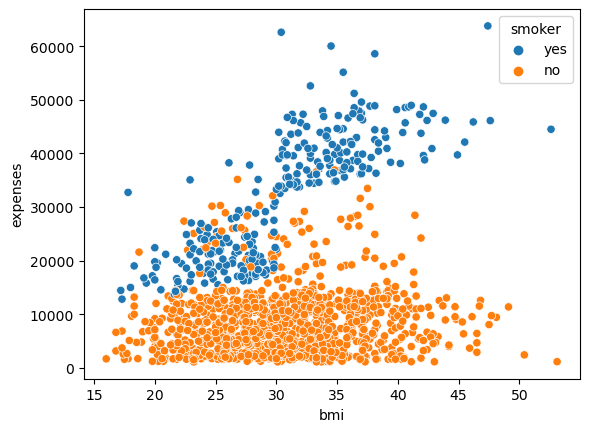

In [48]:
sns.scatterplot(data=df, x='bmi', y='expenses', hue='smoker')

# Categorical Features Analysis

<Axes: xlabel='sex', ylabel='expenses'>

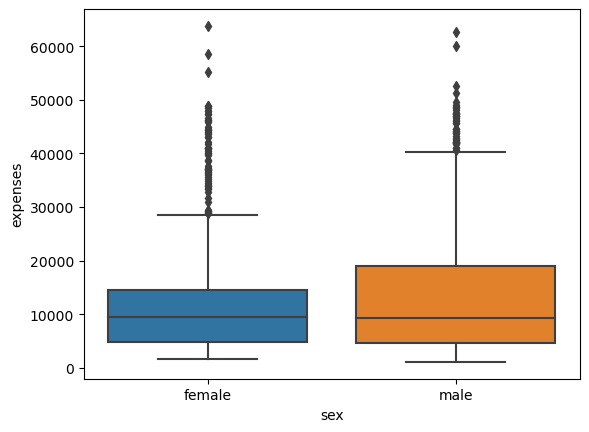

In [50]:
sns.boxplot(x ='sex', y='expenses',data=df)

<Axes: xlabel='smoker', ylabel='expenses'>

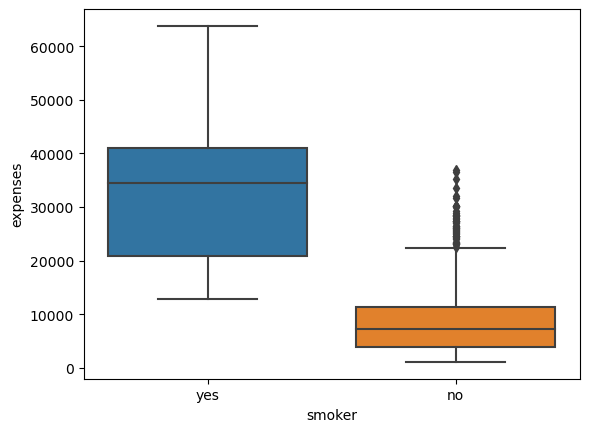

In [51]:
sns.boxplot(x='smoker',y='expenses',data=df)

# Region vs expenses

<Axes: xlabel='region', ylabel='expenses'>

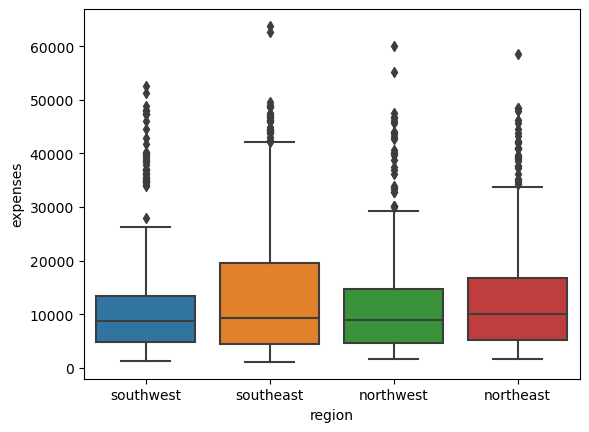

In [52]:
sns.boxplot(x = 'region', y = 'expenses', data=df)

# Distribution of each feature

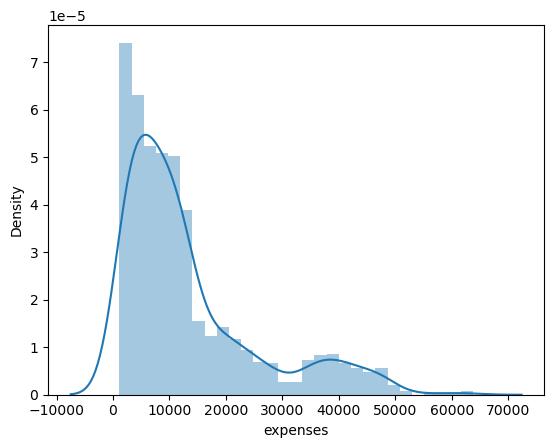

In [53]:
sns.distplot(df['expenses'])
plt.show()

# BMI

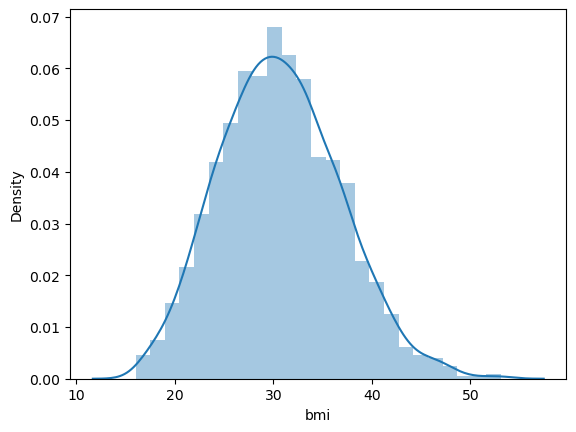

In [54]:
sns.distplot(df['bmi'])
plt.show()

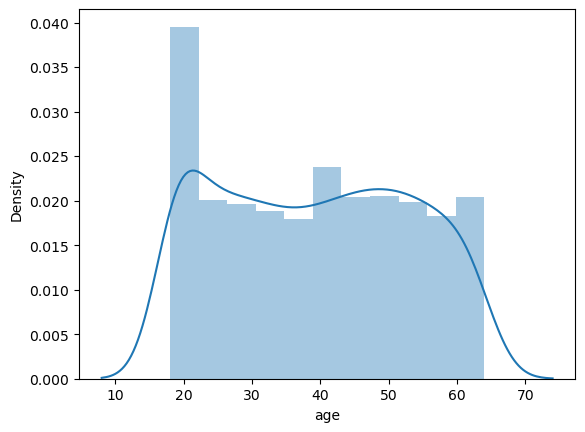

In [55]:
sns.distplot(df['age'])
plt.show()

In [56]:
from sklearn.preprocessing import LabelEncoder
df1 = df

In [59]:
for c in categorical_features:
    label = LabelEncoder()
    label.fit(list(df[c].values))
    df1[c] = label.transform(list(df1[c].values))

In [60]:
df1.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [61]:
X = df1.drop('expenses',axis=1)
y = df1['expenses']